### 3-1．データ理解
#### データの読み込み

In [1]:
# Pandasの読み込み
import pandas as pd

# ファイルの読み込み
bank_df = pd.read_csv("data/bank.csv", sep=',')

# 先頭から5行目まで表示
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [2]:
# 末尾から10行目まで表示
bank_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [3]:
# データの行数・列数を確認
print(bank_df.shape)

(7234, 17)


In [4]:
# データ型を確認
print(bank_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


### 欠損値の確認

In [5]:
# データ行に欠損値が含まれるか
print(bank_df.isnull().any(axis=1))

# データ列に欠損値が含まれるか
print(bank_df.isnull().any(axis=0))

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool


In [6]:
# データ行ごとの欠損値の個数
print(bank_df.isnull().sum(axis=1))

# データ列ごとの欠損値の個数
print(bank_df.isnull().sum(axis=0))

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [7]:
# データ行ごとの欠損値の個数
print(bank_df.isnull().sum(axis=1).sort_values(ascending=False))

1837    4
1629    4
139     4
1814    4
1670    4
       ..
5919    0
5918    0
5917    0
5916    0
5379    0
Length: 7234, dtype: int64


### 統計量の計算

In [8]:
# データ型が数値項目の各種統計量の計算
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


In [9]:
# データ型が文字列項目の各種統計量の計算
bank_df.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


### データの可視化１

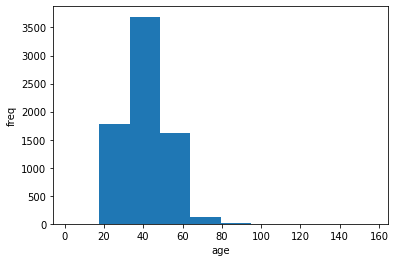

In [10]:
# Matplotlibの読み込み
import matplotlib.pyplot as plt
%matplotlib inline

# ageのヒストグラムを作成
plt.hist(bank_df['age'])
# x軸（横軸）とy軸（縦軸）のラベルを追加
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

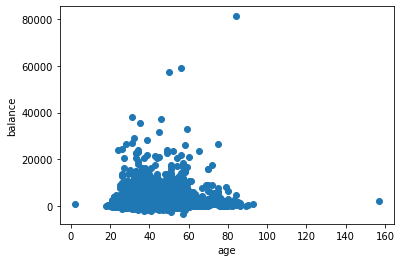

              age   balance
age      1.000000  0.112364
balance  0.112364  1.000000


In [11]:
# 散布図作成
plt.scatter(bank_df['age'], bank_df['balance'])
# x軸（横軸）とy軸（縦軸）のラベルを追加
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

# 相関係数
print(bank_df[['age', 'balance']].corr())

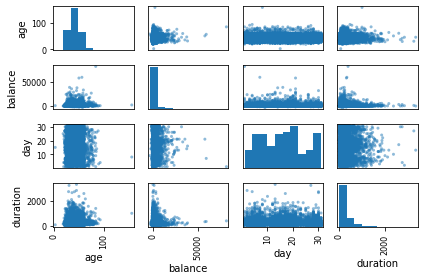

In [12]:
# 散布図行列の描画
pd.plotting.scatter_matrix(bank_df[['age','balance','day','duration']])
plt.tight_layout()
plt.show()

In [13]:
# objectの比率を計算（値しかないデータには不適用）
print(bank_df['job'].value_counts(ascending=False, normalize=True))

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


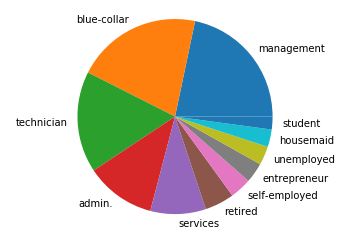

In [14]:
# ラベル
label = bank_df['job'].value_counts(ascending=False, normalize=True).index
# 値
vals = bank_df['job'].value_counts(ascending=False, normalize=True).values

# 円グラフを作成
plt.pie(vals, labels=label)
plt.axis('equal')
plt.show()

### データの可視化２

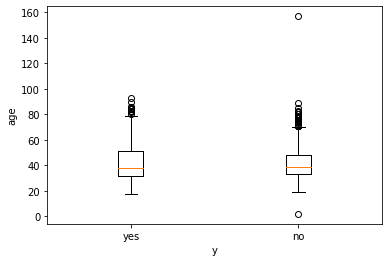

In [15]:
# yがyesとnoのときのageデータを抽出
y_yes = bank_df[bank_df['y'] == 'yes']
y_no = bank_df[bank_df['y'] == 'no']
# yesとnoのデータをまとめる
y_age = [y_yes['age'], y_no['age']]

# 箱ひげ図の描画
plt.boxplot(y_age)
# x軸（横軸）とy軸（縦軸）のラベルを追加
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
# y軸（縦軸）のラベルを追加
plt.setp(ax, xticklabels = ['yes','no'])
plt.show()

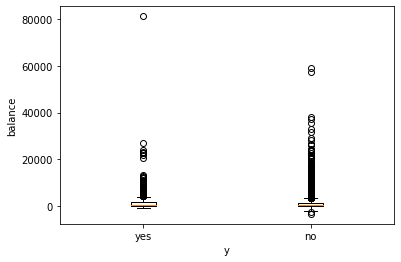

In [16]:
# yesとnoのデータをまとめる
y_balance = [y_yes['balance'], y_no['balance']]

# 箱ひげ図の描画
plt.boxplot(y_balance)
# x軸（横軸）とy軸（縦軸）のラベルを追加
plt.xlabel('y')
plt.ylabel('balance')
ax = plt.gca()
# y軸（縦軸）のラベルを追加
plt.setp(ax, xticklabels = ['yes','no'])
plt.show()